## Alucar - > Analisando As Vendas

In [24]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt 

In [25]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [26]:
alucar.shape

(24, 2)

In [27]:
alucar.isna().sum().sum()

0

In [28]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [29]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

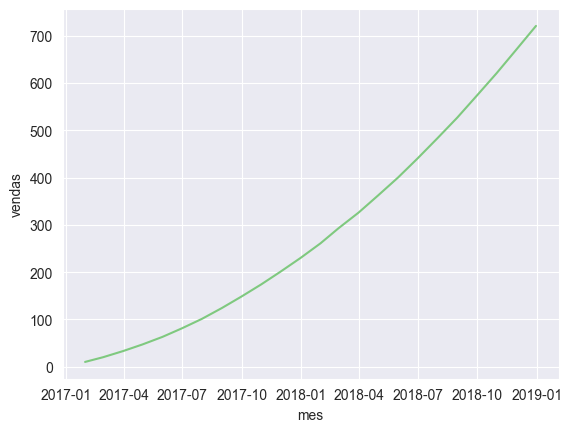

In [30]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

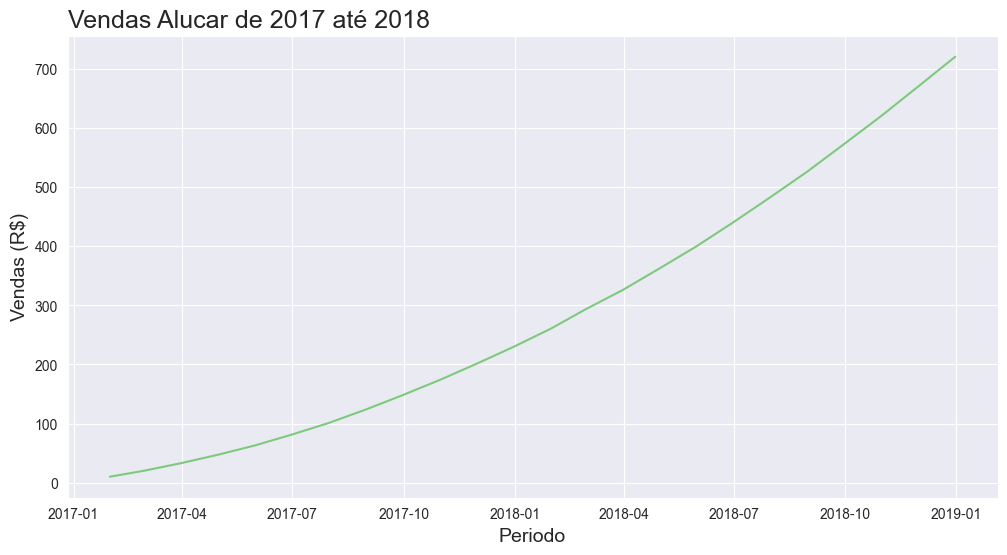

In [31]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 até 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Periodo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [32]:
alucar['Aumento'] = alucar['vendas'].diff()
alucar['Aumento'] = alucar['Aumento'].fillna(0)
alucar.rename(columns = {'mes': 'Mes', 'vendas': 'Vendas'}, inplace = True) 
alucar.head()

,Mes,Vendas,Aumento
0,2017-01-31,10,0.0
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


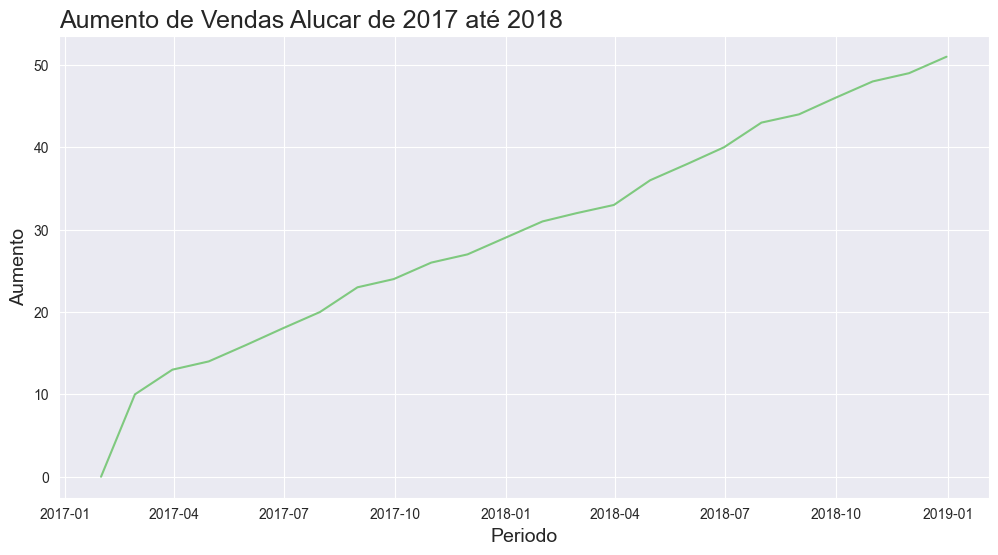

In [33]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'Mes', y = 'Aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento de Vendas Alucar de 2017 até 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Periodo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [34]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

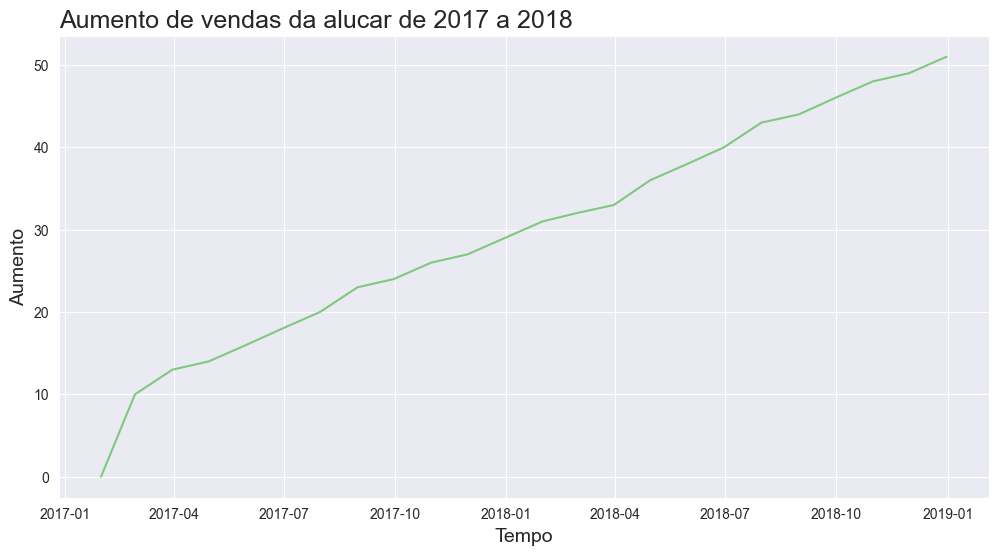

In [35]:
plotar('Aumento de vendas da alucar de 2017 a 2018', 
    'Tempo', 'Aumento', 'Mes','Aumento', alucar)

In [36]:
alucar['Aceleracao'] = alucar['Aumento'].diff()
alucar['Aceleracao'] = alucar['Aceleracao'].fillna(0)
alucar.head()

,Mes,Vendas,Aumento,Aceleracao
0,2017-01-31,10,0.0,0.0
1,2017-02-28,20,10.0,10.0
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


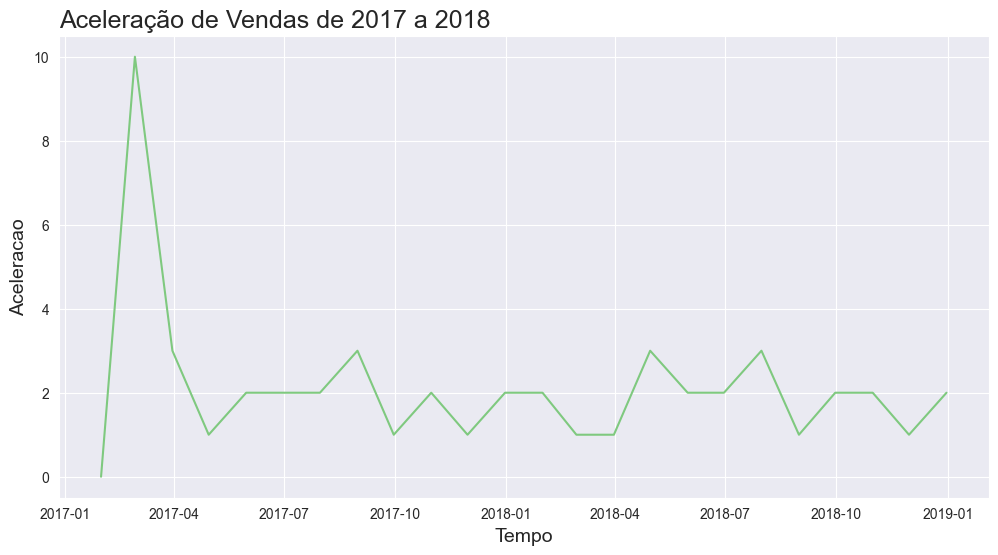

In [37]:
plotar('Aceleração de Vendas de 2017 a 2018', 'Tempo', 'Aceleracao', 'Mes',
    'Aceleracao', alucar)

<AxesSubplot:xlabel='Mes', ylabel='Aceleracao'>

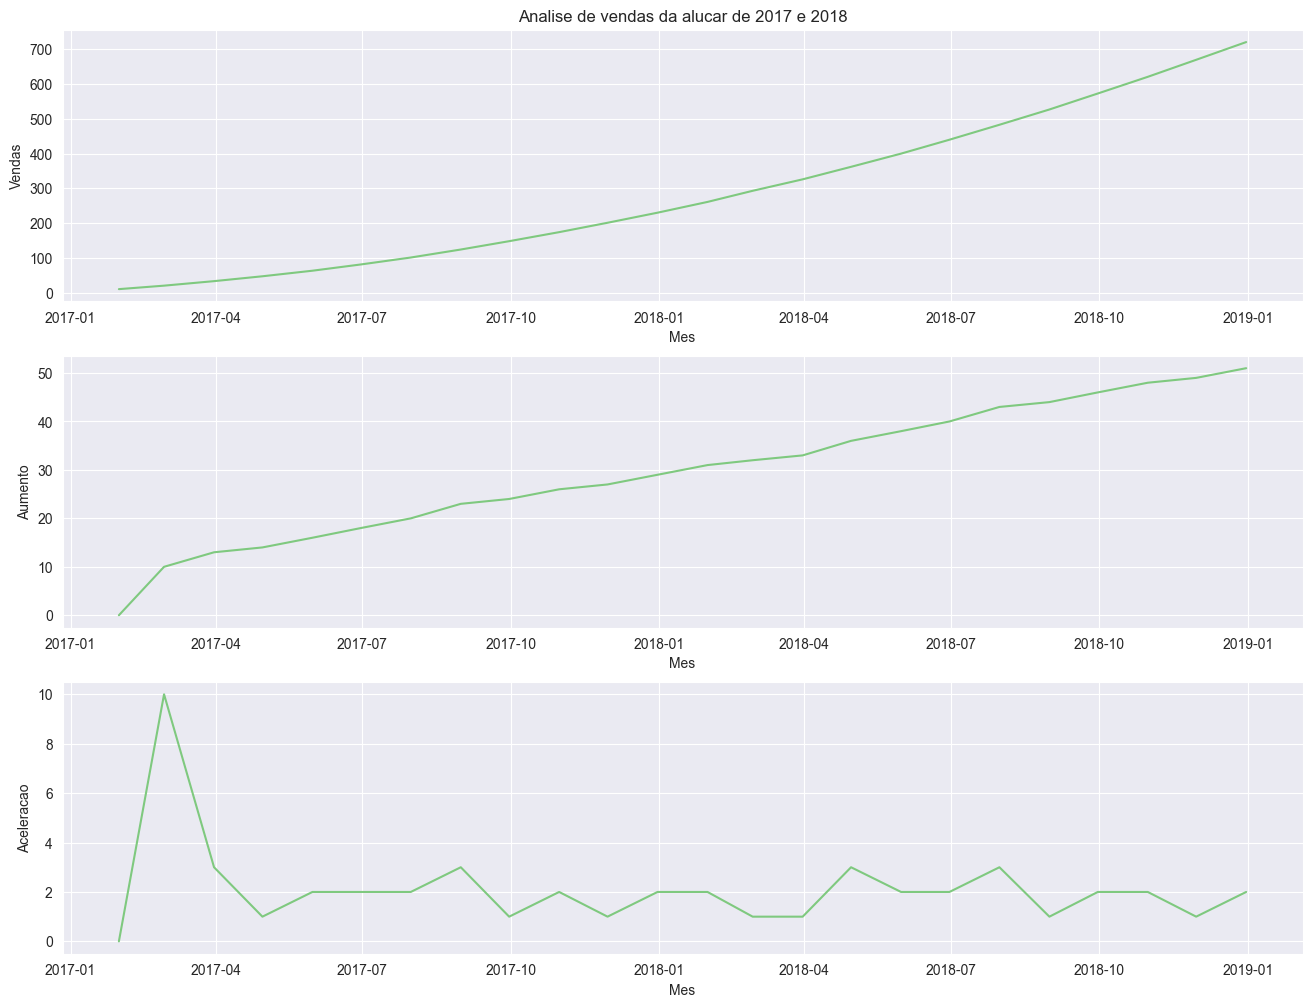

In [38]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas da alucar de 2017 e 2018')
sns.lineplot(x = 'Mes', y = 'Vendas', data = alucar)
ax = plt.subplot(3,1,2)
sns.lineplot(x = 'Mes', y = 'Aumento', data = alucar)
ax = plt.subplot(3,1,3)
sns.lineplot(x = 'Mes', y = 'Aceleracao', data = alucar)

In [39]:
def plot_de_comparacao(x, y1, y2, y3, titulo, dataset):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)

In [40]:
plot_de_comparacao('Mes', 'Vendas', 'Aumento', 'Aceleraçao', da)

NameError: name 'dataset' is not defined